In [1]:
import os
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = loadmat("./Homework_12_DATA.mat")

In [3]:
A_100 = data["A_100"]
A_50 = data["A_50"]

In [4]:
#内置的一维精确搜索算法为牛顿法
class Func():
    def __init__(self, A):
        self.delta = 1e-9
        self.epsilon = 1e-9
        self.A = A
        self.n = A.shape[0]
        self.m = A.shape[1]
        self.bound1 = np.ones((self.n,1))
        self.bound2 = np.ones((self.m,1))
        
    def value(self, X):
        return -np.sum(np.log(1-np.dot(self.A,X))) - np.sum(np.log(1-X**2))
    
    def grad(self, X):
        return np.dot(self.A.T, 1/(1-np.dot(self.A,X))) + 2*X/(1-X**2)
        
    def hessian(self, X):
        tmp = (self.A/(1-np.dot(self.A,X)))
        return np.dot(tmp.T, tmp) + np.eye(self.n)*2*(1+X**2)/(1-X**2)**2
    
    def diff_t(self, X, D, t):
        return np.dot(self.grad(X+t*D).T, D)
    
    def diff_2_t(self, X, D, t):
        return np.sum(np.dot(self.hessian(X+t*D).T, D))
    
    def Newton_1D_Method(self, X0, D, delta):#一维精确搜索——牛顿法
        t_tmp=0
        while(abs(self.diff_t(X0,D,t_tmp))>delta):
            t_tmp=t_tmp-self.diff_t(X0,D,t_tmp)/self.diff_2_t(X0,D,t_tmp)
            if(np.sum(self.A@(X0+t_tmp+D)>=self.bound1)>0 or np.sum((X0+t_tmp+D)**2>=self.bound2)>0):
                break
        return X0+t_tmp*D
    
    def Backtracking(self, X0, D, delta, alpha = 0.5, beta = 0.9999):
        t_tmp = 1
        #print(self.value(X0+t_tmp*D), self.value(X0) + alpha*t_tmp*np.dot(self.grad(X0).T,D))
        while(self.value(X0+t_tmp*D) > self.value(X0) + alpha*t_tmp*np.dot(self.grad(X0).T,D)):
            t_tmp = beta*t_tmp
            
        while(abs(self.diff_t(X0,D,t_tmp))>delta):
            t_tmp=t_tmp+self.diff_t(X0,D,t_tmp)/self.diff_2_t(X0,D,t_tmp)
            if(np.sum(self.A@(X0+t_tmp+D)>=self.bound1)>0 or np.sum((X0+t_tmp+D)**2>=self.bound2)>0):
                break
        return X0+t_tmp*D, np.sqrt(np.sum((t_tmp*D)**2))
    
    def NewtonMethod(self, X0, epsilon):
        tmp_x = X0
        values = [self.value(tmp_x)]
        t_ks = []
        hessian_inv = np.linalg.inv(self.hessian(tmp_x))
        delta_x_nt = -np.dot(hessian_inv, self.grad(tmp_x))
        lamda_square = np.dot(np.dot(self.grad(tmp_x).T, hessian_inv), self.grad(tmp_x))
        while(np.sqrt(np.sum(self.grad(tmp_x)**2)) > epsilon):
            tmp_x, t_k = self.Backtracking(tmp_x, delta_x_nt, self.delta)
            hessian_inv = np.linalg.inv(self.hessian(tmp_x))
            delta_x_nt = -np.dot(hessian_inv, self.grad(tmp_x))
            lamda_square = np.dot(np.dot(self.grad(tmp_x).T, hessian_inv), self.grad(tmp_x))
            values.append(self.value(tmp_x))
            t_ks.append(t_k)
            #print(self.value(tmp_x), np.sum(self.grad(tmp_x)**2), lamda_square/2)
            
        return self.value(tmp_x), np.array(values), np.array(t_ks).reshape(-1)
    
    def GradMethod(self, X0, epsilon, step = 1e-5):
        tmp_x = X0
        grad = self.grad(tmp_x)
        while(np.dot(grad.T,grad)>epsilon):
            #print(self.value(tmp_x))
            tmp_x = tmp_x - step*grad
            if(np.sum(self.A@(tmp_x)>=self.bound1)>0 or np.sum((tmp_x)**2>=self.bound2)>0):
                break
        return tmp_x

In [5]:
func1 = Func(A_50)
opt_value1, values1, tks1 = func1.NewtonMethod(np.zeros((50,1)), epsilon=1e-8)

/tmp/ipykernel_246/2081299776.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(values1-opt_value1), "-o", label="optimal value = %f"%(opt_value1))


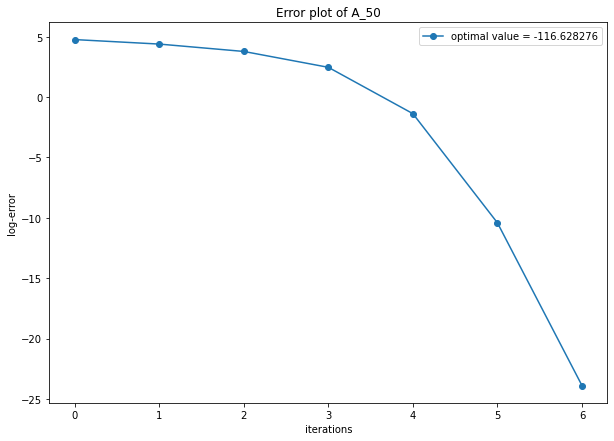

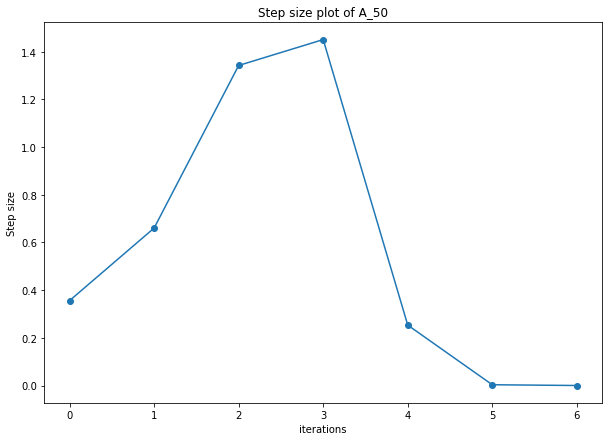

In [6]:
plt.figure(figsize=(10,7))
plt.plot(np.log(values1-opt_value1), "-o", label="optimal value = %f"%(opt_value1))
plt.xlabel("iterations")
plt.ylabel("log-error")
plt.title("Error plot of A_50")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.plot(tks1, "-o")
plt.xlabel("iterations")
plt.ylabel("Step size")
plt.title("Step size plot of A_50")
plt.show()

In [7]:
func2 = Func(A_100)
opt_value2, values2, tks2 = func2.NewtonMethod(np.zeros((100,1)), epsilon=1e-8)

/tmp/ipykernel_246/1909059464.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(values2-opt_value2), "-o", label="optimal value = %f"%(opt_value2))


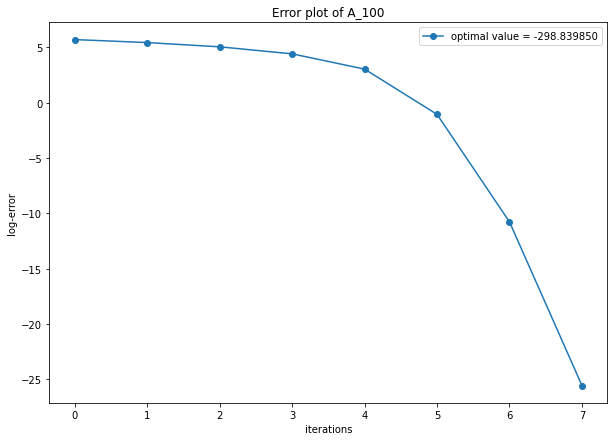

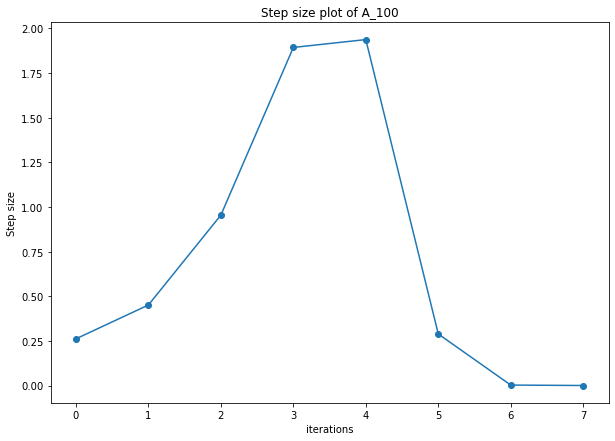

In [8]:
plt.figure(figsize=(10,7))
plt.plot(np.log(values2-opt_value2), "-o", label="optimal value = %f"%(opt_value2))
plt.xlabel("iterations")
plt.ylabel("log-error")
plt.title("Error plot of A_100")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.plot(tks2, "-o")
plt.xlabel("iterations")
plt.ylabel("Step size")
plt.title("Step size plot of A_100")
plt.show()